In [1]:
# QUESTIONS:
# How many different companies are represented in the data set?
# What is the total number of jobs created for businesses in Queens?
# How many different unique email domains names are there in the data set?
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
# Save your result for the previous question as a CSV file.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
energy_save = pd.read_csv(r"data/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv")
energy_save.head()

,Period,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,...,Electric Savings,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,FY2018,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,...,NaN,QUEENS,40.745706,-73.929565,402.0,26.0,4003160.0,4.002220e+09,17902.0,QN0202
1,FY2018,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,...,NaN,STATEN IS,40.632845,-74.151048,501.0,49.0,5146740.0,5.011610e+09,239.0,SI0107
2,FY2018,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,...,NaN,QUEENS,40.785144,-73.844833,407.0,19.0,4098344.0,4.040850e+09,929.0,QN0701
3,FY2018,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,...,NaN,BROOKLYN,40.673106,-74.002300,306.0,38.0,3336622.0,3.005720e+09,5302.0,BK0601
4,FY2018,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,...,NaN,QUEENS,40.742386,-73.932148,402.0,26.0,4003447.0,4.002520e+09,19901.0,QN0202


In [4]:
#Q1: How many different companies are represented in the data set?
energy_save["Company Name"] = energy_save["Company Name"].str.lower()
energy_save["Company Name"] = energy_save["Company Name"].str.strip(" .,")
energy_save["Company Name"] = energy_save["Company Name"].str.replace("''+","'",regex=True)
energy_save["Company Name"] = energy_save["Company Name"].str.replace("  +"," ",regex=True)
energy_save["Company Name"] = energy_save["Company Name"].str.replace(",","")
energy_save["Company Name"] = energy_save["Company Name"].str.replace("coporation","corp")
energy_save["Company Name"] = energy_save["Company Name"].str.replace("corporation","corp")
energy_save["Company Name"] = energy_save["Company Name"].str.replace("incorporated","corp")



len(energy_save["Company Name"].dropna().str.lower().unique())

762

In [5]:
#Q2: What is the total number of jobs created for businesses in Queens?
energy_save["Borough"].unique() # no clean up required


array(['QUEENS', 'STATEN IS', 'BROOKLYN', 'MANHATTAN', nan, 'BRONX'],
      dtype=object)

In [6]:
energy_save[energy_save["Borough"] == "QUEENS"]["Job created"].sum()

1196.0

In [7]:
#Q3: How many different unique email domains names are there in the data set?
energy_save["company email"] = energy_save["company email"].str.lower()
energy_save["company domain"] = energy_save["company email"].str.split('@').str[1] #split at @, assume 2 values only
energy_save_copy = energy_save[energy_save["company domain"].str.strip().str.contains(" ")==False] # check if there is space in the domain. That would be wrong 
energy_save_copy = energy_save_copy[energy_save_copy["company domain"].str.contains(".")] # check that a . must exist in the domain. Without that its not valid - A usecase exists
energy_save_copy = energy_save_copy[~energy_save_copy["company domain"].str.contains("^[.]",regex=True)] # must not start with a . A use case exists
energy_save_copy = energy_save_copy[~energy_save_copy["company domain"].str.contains("[!@#$%^&*()]",regex=True)] # must not contain any punctuation besides .
len(energy_save_copy["company domain"].dropna().unique())

585

In [17]:
sum(energy_save["Company Name"].isna())

0

In [19]:
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
energy_save_grpby = energy_save.groupby("Neighborhood Tabulation Area (NTA) (2020)").agg({'Total Savings': 'mean','Company Name' : 'count', 'Job created': 'sum'}).reset_index()
energy_save_grpby = energy_save_grpby[energy_save_grpby["Company Name"] >= 5]
energy_save_grpby

,Neighborhood Tabulation Area (NTA) (2020),Total Savings,Company Name,Job created
0,BK0101,10367.961795,78,16.0
1,BK0102,12599.753333,9,15.0
2,BK0103,19150.922857,7,0.0
3,BK0104,21158.253077,104,187.0
4,BK0201,15102.036364,11,0.0
...,...,...,...,...
89,QN1305,166379.352000,5,0.0
90,QN1306,21160.505200,25,0.0
92,SI0106,6338.252857,7,10.0
93,SI0107,113610.160000,15,300.0


In [22]:
# Save your result for the previous question as a CSV file.
energy_save_grpby.drop(columns=['Company Name']).to_csv('data/nta_jobs_saving.csv',index=False)

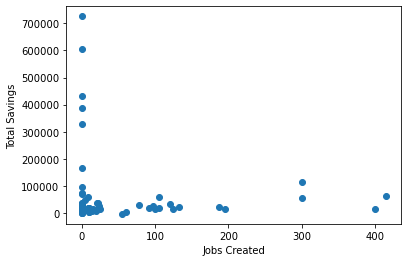

In [27]:
#scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
plt.scatter(energy_save_grpby["Job created"], energy_save_grpby["Total Savings"]) 
plt.xlabel("Jobs Created")
plt.ylabel("Total Savings")
plt.show()

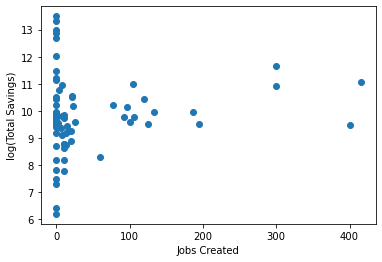

In [35]:
energy_save_grpby_temp = energy_save_grpby[energy_save_grpby["Total Savings"] != 0] # can not log of 0
plt.scatter(energy_save_grpby_temp["Job created"], np.log(energy_save_grpby_temp["Total Savings"]))
plt.xlabel("Jobs Created")
plt.ylabel("log(Total Savings)")
plt.show()

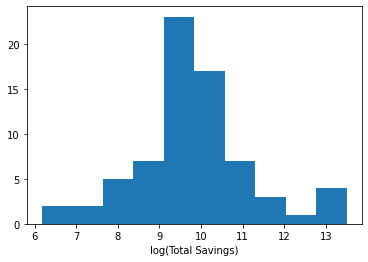

In [37]:
#histogram of the log of the average total savings. - given question seems incomplete. 
plt.hist(np.log(energy_save_grpby_temp["Total Savings"]))
plt.xlabel("log(Total Savings)")
plt.show()

In [41]:
#line plot of the total jobs created for each month.

energy_save["Effective Date"] = pd.to_datetime(energy_save["Effective Date"])

In [46]:
energy_save["Effective Month"] = energy_save["Effective Date"].dt.to_period('M')
energy_save_months = energy_save.groupby("Effective Month").agg({ 'Job created': 'sum'}).reset_index()
energy_save_months

,Effective Month,Job created
0,1993-02,25.0
1,1993-04,10.0
2,1994-04,15.0
3,1998-10,17.0
4,2000-04,0.0
...,...,...
197,2022-01,0.0
198,2022-03,0.0
199,2022-04,0.0
200,2022-05,0.0


In [57]:
energy_save_months["Effective Month"].dt.to_timestamp()

0     1993-02-01
1     1993-04-01
2     1994-04-01
3     1998-10-01
4     2000-04-01
         ...    
197   2022-01-01
198   2022-03-01
199   2022-04-01
200   2022-05-01
201   2022-06-01
Name: Effective Month, Length: 202, dtype: datetime64[ns]

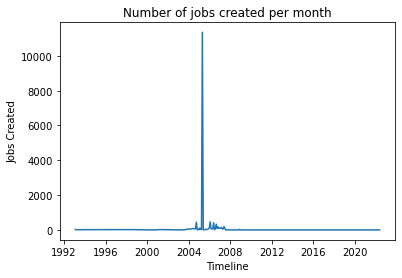

In [59]:
plt.plot(energy_save_months["Effective Month"].dt.to_timestamp(),energy_save_months["Job created"])
plt.ylabel("Jobs Created")
plt.xlabel("Timeline")
plt.title("Number of jobs created per month")
plt.show()

In [62]:
pd.__version__

'1.3.5'

In [63]:
np.__version__

'1.21.5'

In [64]:
import matplotlib
matplotlib.__version__

'3.5.1'